<a href="https://colab.research.google.com/github/GayanthaL/detection-of-CKD-using-machine-learning-techniques/blob/main/Local_Test01_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Ignore warnings for more covinience
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Load the dataset using Pandas
import pandas as pd

# Replace 'path_to_your_file' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/My Drive/Research/Sri Lankan CKD Dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


Mounted at /content/drive
   id   age  weight gender      cr  cru    al  gl     na    ca    k     cl  \
0   1  72.0    52.0      M  249.43  NaN  34.9 NaN  142.0  2.43  5.0  113.0   
1   2  76.0    52.0      M  216.05  NaN  41.3 NaN  145.0  2.40  4.7  114.0   
2   3  60.0    80.4      M  155.40  NaN  33.7 NaN  135.0  2.00  4.2  103.0   
3   4  65.0    53.4      F  127.50  NaN  41.8 NaN  138.0  2.80  4.4  100.0   
4   5  59.0    60.4      M  172.71  NaN  39.7 NaN  128.0  2.20  3.6   91.0   

     pr  iron     ua   wbc   rbc    hg    plt  class  
0   NaN   NaN  415.8   NaN   NaN   NaN    NaN      1  
1   NaN  13.0    NaN  9.85  3.44  11.3  356.0      1  
2  11.6  12.0    NaN  9.24  4.60   8.4  329.0      1  
3   NaN   NaN  290.7  9.87  4.32  11.7  364.0      1  
4   NaN   NaN  367.8  8.93  4.82  13.8  214.0      1  


In [ ]:
# Print unique values for each column
for column in data.columns:
    print(f"Unique values in '{column}': {data[column].unique()}")
    print("\n")

Unique values in 'id': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241

In [ ]:
# dropping id column
data.drop('id', axis = 1, inplace = True)

In [ ]:
# Dictionary mapping abbreviated column names to full names
column_name_mapping = {
    "age": "Age",
    "weight": "Weight",
    "gender": "Gender",
    "cr": "Creatinine",
    "cru": "Creatinine Clearance",
    "al": "Albumin",
    "gl": "Glucose",
    "na": "Sodium",
    "ca": "Calcium",
    "k": "Potassium",
    "cl": "Chloride",
    "wbc": "White Blood Cell Count",
    "rbc": "Red Blood Cell Count",
    "hg": "Hemoglobin",
    "plt": "Platelet Count",
    "class": "Class",  # Assuming "class" is the target variable; leave it as is
    # Add any remaining columns if necessary
}

# Rename columns in the DataFrame
data.rename(columns=column_name_mapping, inplace=True)

# Display the updated DataFrame's columns to confirm renaming
print("Updated column names:")
print(data.columns)



Updated column names:
Index(['Age', 'Weight', 'Gender', 'Creatinine', 'Creatinine Clearance',
       'Albumin', 'Glucose', 'Sodium', 'Calcium', 'Potassium', 'Chloride',
       'pr', 'iron', 'ua', 'White Blood Cell Count', 'Red Blood Cell Count',
       'Hemoglobin', 'Platelet Count', 'Class'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Identify categorical columns (assuming 'gender' is categorical)
categorical_columns = ['Gender']

# Apply Label Encoding
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Display the first few rows to verify encoding
print(data.head())

    Age  Weight  Gender  Creatinine  Creatinine Clearance  Albumin  Glucose  \
0  72.0    52.0       1      249.43                   NaN     34.9      NaN   
1  76.0    52.0       1      216.05                   NaN     41.3      NaN   
2  60.0    80.4       1      155.40                   NaN     33.7      NaN   
3  65.0    53.4       0      127.50                   NaN     41.8      NaN   
4  59.0    60.4       1      172.71                   NaN     39.7      NaN   

   Sodium  Calcium  Potassium  Chloride    pr  iron     ua  \
0   142.0     2.43        5.0     113.0   NaN   NaN  415.8   
1   145.0     2.40        4.7     114.0   NaN  13.0    NaN   
2   135.0     2.00        4.2     103.0  11.6  12.0    NaN   
3   138.0     2.80        4.4     100.0   NaN   NaN  290.7   
4   128.0     2.20        3.6      91.0   NaN   NaN  367.8   

   White Blood Cell Count  Red Blood Cell Count  Hemoglobin  Platelet Count  \
0                     NaN                   NaN         NaN             N

In [ ]:
# show information a bout data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     405 non-null    float64
 1   Weight                  402 non-null    float64
 2   Gender                  406 non-null    int64  
 3   Creatinine              390 non-null    float64
 4   Creatinine Clearance    26 non-null     float64
 5   Albumin                 207 non-null    float64
 6   Glucose                 72 non-null     float64
 7   Sodium                  366 non-null    float64
 8   Calcium                 91 non-null     float64
 9   Potassium               367 non-null    float64
 10  Chloride                213 non-null    float64
 11  pr                      76 non-null     float64
 12  iron                    22 non-null     float64
 13  ua                      24 non-null     float64
 14  White Blood Cell Count  366 non-null    fl

In [ ]:
# Calculate missing value percentage for each column
missing_percentage = data.isnull().mean() * 100

# Identify columns to drop based on the 80% missing value threshold
threshold = 80
cols_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop the identified columns
data.drop(columns=cols_to_drop, inplace=True)

# Display the remaining columns and their info
print("Columns after dropping those with more than 80% missing values:")
print(data.info())

Columns after dropping those with more than 80% missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     405 non-null    float64
 1   Weight                  402 non-null    float64
 2   Gender                  406 non-null    int64  
 3   Creatinine              390 non-null    float64
 4   Albumin                 207 non-null    float64
 5   Sodium                  366 non-null    float64
 6   Calcium                 91 non-null     float64
 7   Potassium               367 non-null    float64
 8   Chloride                213 non-null    float64
 9   White Blood Cell Count  366 non-null    float64
 10  Red Blood Cell Count    363 non-null    float64
 11  Hemoglobin              373 non-null    float64
 12  Platelet Count          370 non-null    float64
 13  Class                   406 non

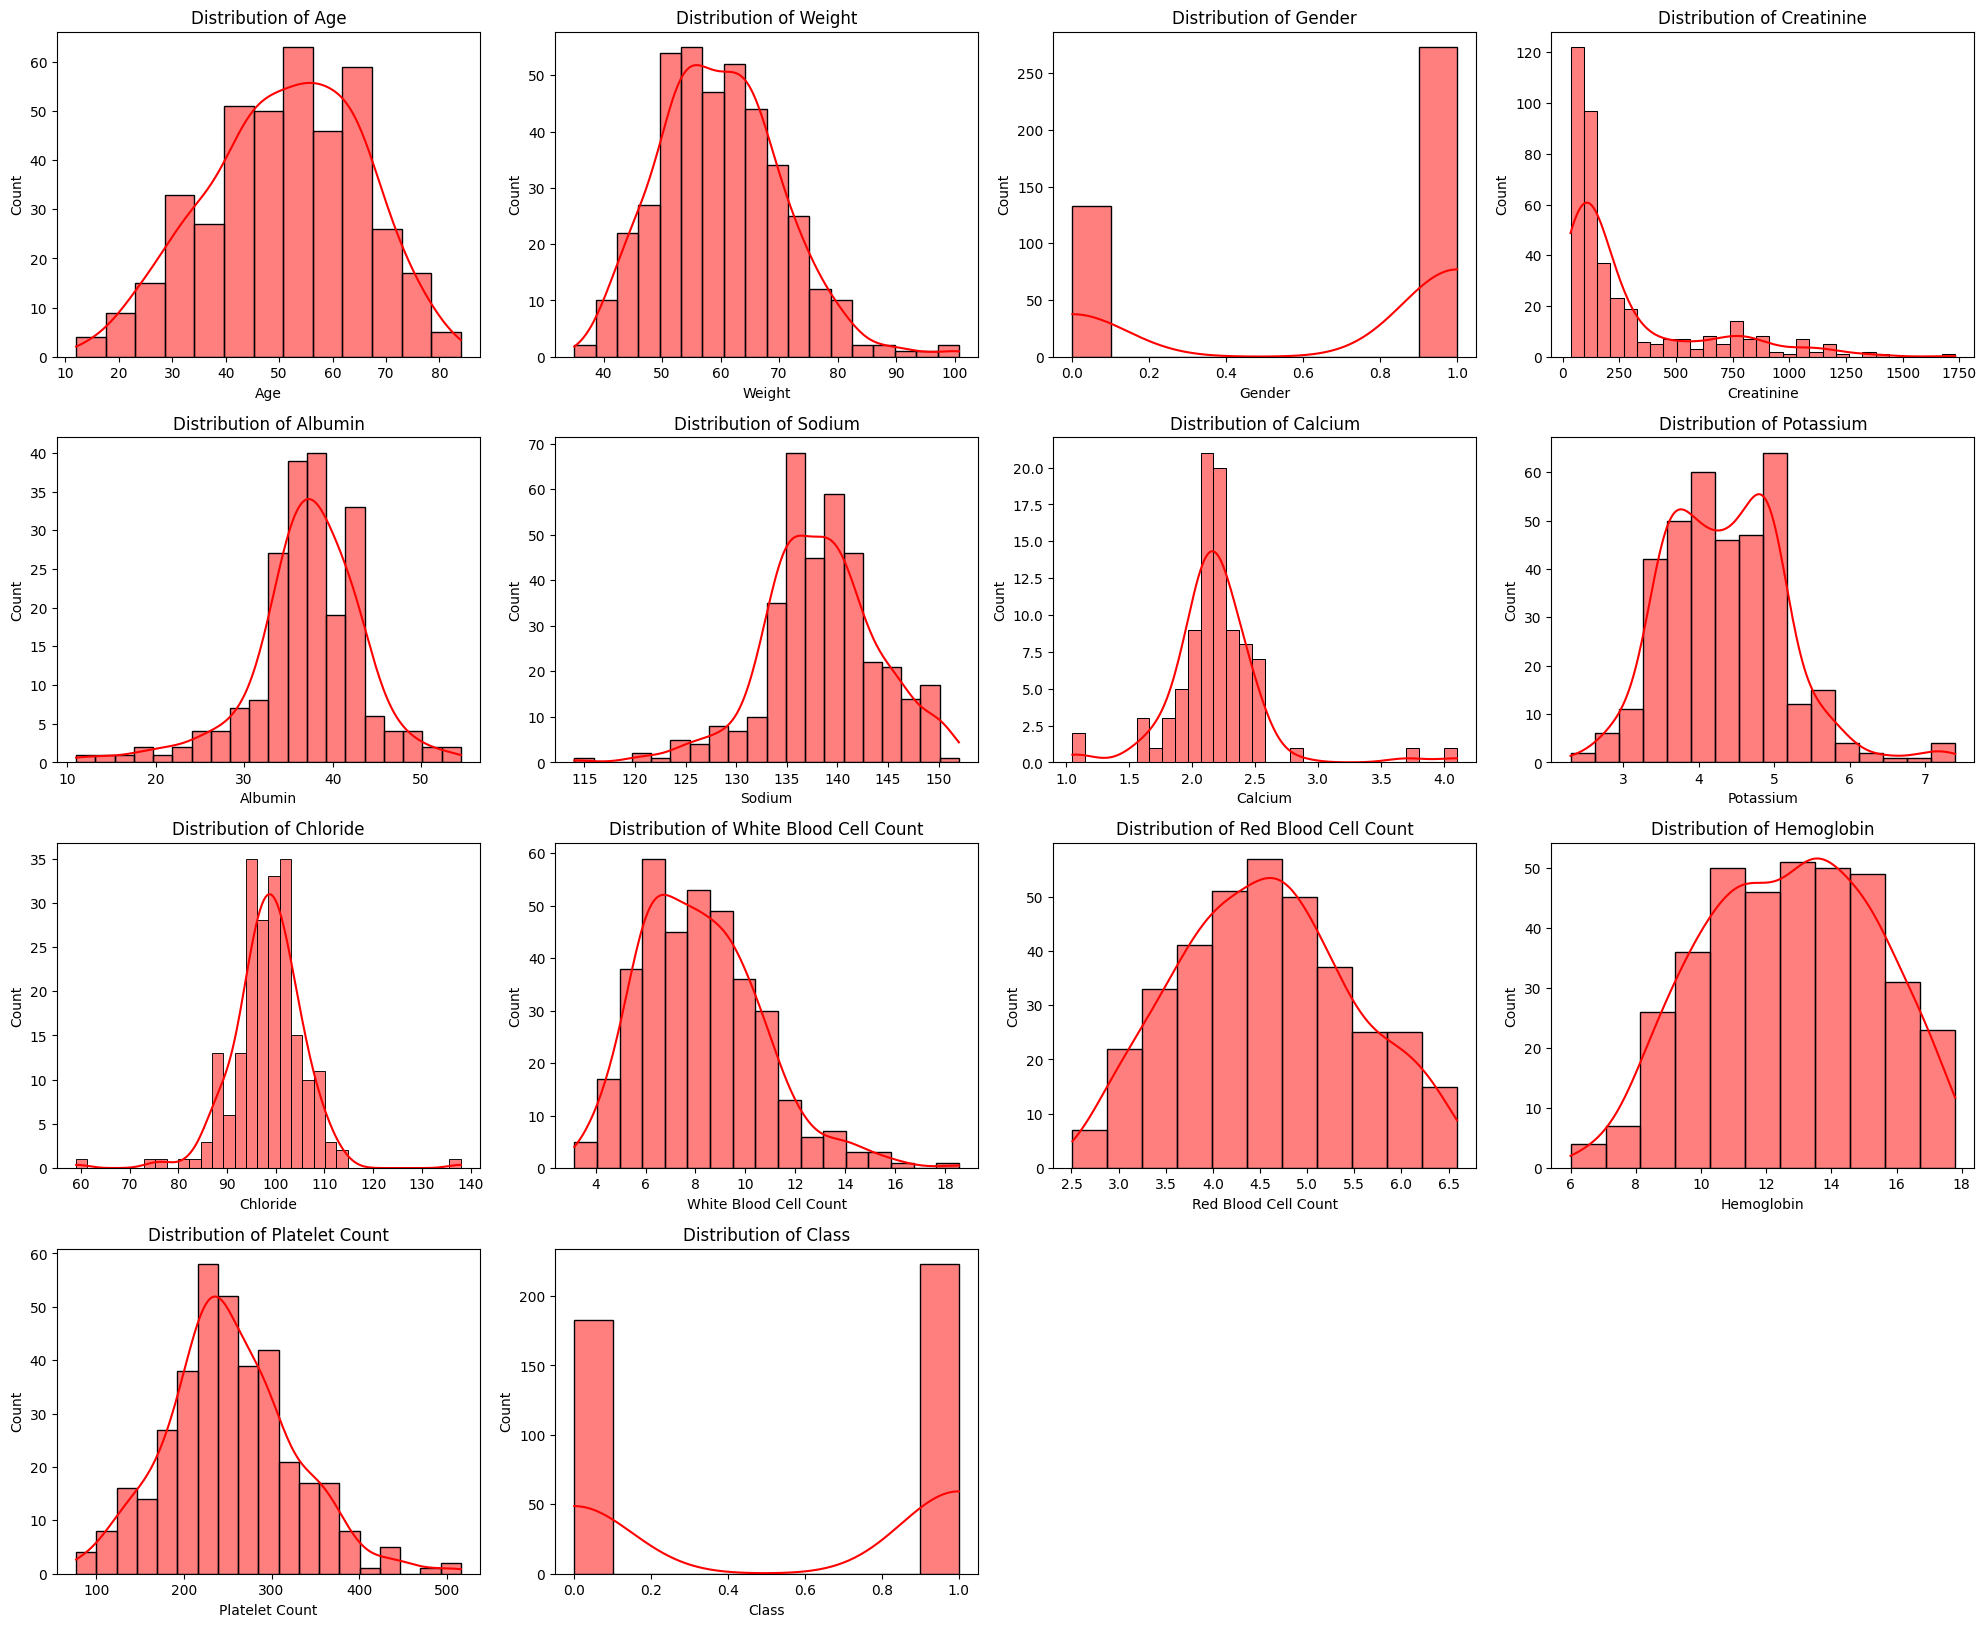

In [ ]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure for a grid of subplots
plt.figure(figsize=(20, 20))

# Loop through each column and create a histogram with KDE
for i, column in enumerate(data.columns, 1):
    plt.subplot(5, 4, i)  # Adjust the grid based on the number of columns
    sns.histplot(data[column], kde=True, color='red')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


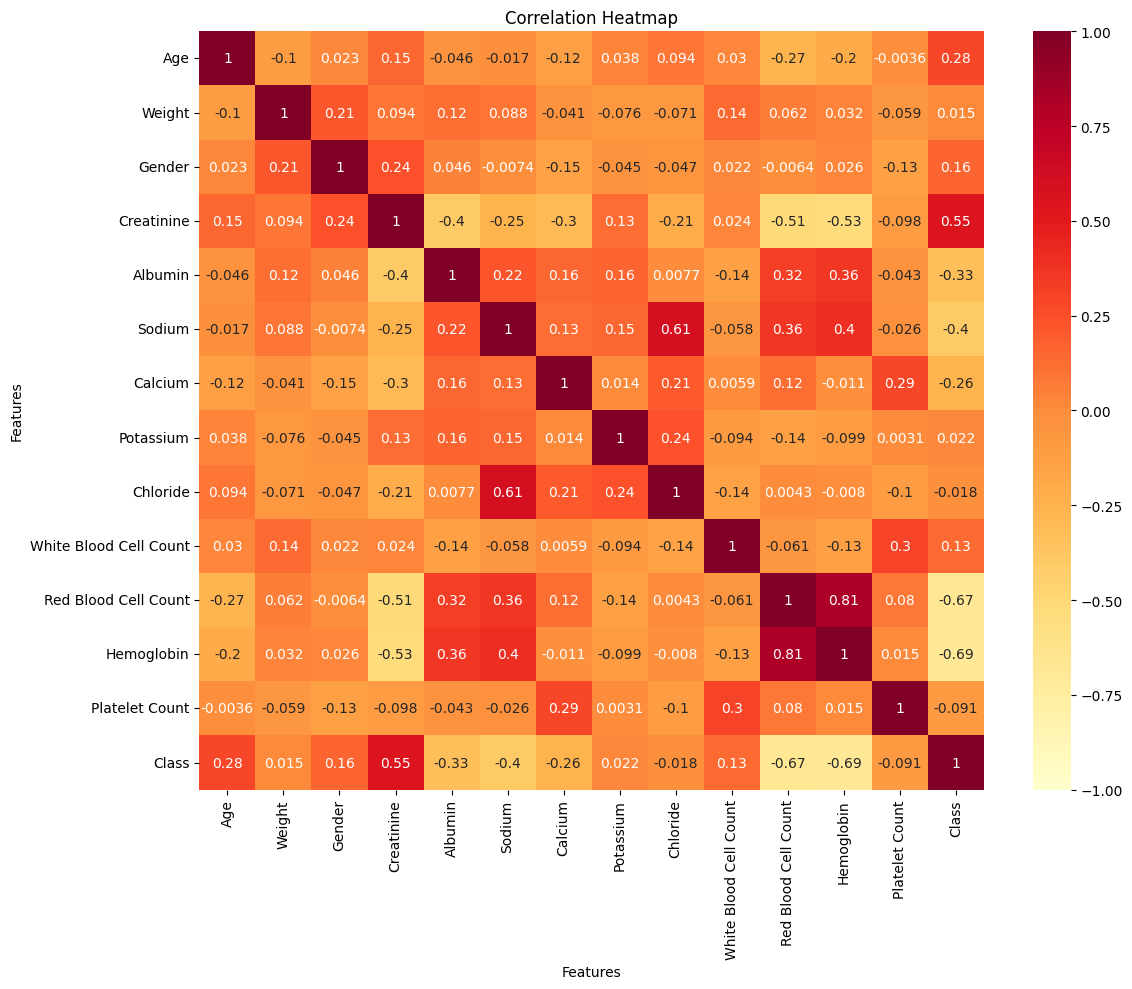

In [ ]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a figure with a custom size
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', vmin=-1, vmax=1)

# Add a title and axis labels
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.5 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=6e949b444d8b0a4d8714fbd2c8d177f286c78a7b3bc92452dd9f844d61778af8
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=e22c368202170e177259403d83ce16e25e0939ee4af087608f7aac687db41043
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
# Import necessary libraries
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer  # Enable experimental iterative imputer
from fancyimpute import IterativeImputer

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
data_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)
print("KNN Imputation:")
print(data_knn_imputed.head())

# Random Forest Imputation
# Function to impute using RandomForest with all feature relationships considered
def random_forest_impute(data):
    data_imputed = data.copy()
    for col in data.columns:
        if data[col].isnull().any():
            # Separate rows with and without missing values in the current column
            data_missing = data_imputed[data_imputed[col].isnull()]
            data_not_missing = data_imputed[data_imputed[col].notnull()]

            # Train RandomForestRegressor on non-missing data with all other features as predictors
            rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
            rf_regressor.fit(data_not_missing.drop(columns=[col]), data_not_missing[col])

            # Predict missing values for the column using all other features
            data_imputed.loc[data_imputed[col].isnull(), col] = rf_regressor.predict(data_missing.drop(columns=[col]))

    return data_imputed

# Apply RandomForest Imputation considering all feature relationships
data_rf_imputed = random_forest_impute(data.copy())
print("\nRandom Forest Imputation:")
print(data_rf_imputed.head())

# MICE Imputation using fancyimpute's IterativeImputer
mice_imputer = IterativeImputer(max_iter=10, random_state=42)
data_iter_imputed = pd.DataFrame(mice_imputer.fit_transform(data), columns=data.columns)
print("\nMICE Imputation:")
print(data_iter_imputed.head())

KNN Imputation:
    Age  Weight  Gender  Creatinine  Albumin  Sodium  Calcium  Potassium  \
0  72.0    52.0     1.0      249.43     34.9   142.0     2.43        5.0   
1  76.0    52.0     1.0      216.05     41.3   145.0     2.40        4.7   
2  60.0    80.4     1.0      155.40     33.7   135.0     2.00        4.2   
3  65.0    53.4     0.0      127.50     41.8   138.0     2.80        4.4   
4  59.0    60.4     1.0      172.71     39.7   128.0     2.20        3.6   

   Chloride  White Blood Cell Count  Red Blood Cell Count  Hemoglobin  \
0     113.0                   7.654                 4.948       13.72   
1     114.0                   9.850                 3.440       11.30   
2     103.0                   9.240                 4.600        8.40   
3     100.0                   9.870                 4.320       11.70   
4      91.0                   8.930                 4.820       13.80   

   Platelet Count  Class  
0           266.2    1.0  
1           356.0    1.0  
2      

In [ ]:
data_knn_imputed.info()
data_rf_imputed.info()
data_iter_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     406 non-null    float64
 1   Weight                  406 non-null    float64
 2   Gender                  406 non-null    float64
 3   Creatinine              406 non-null    float64
 4   Albumin                 406 non-null    float64
 5   Sodium                  406 non-null    float64
 6   Calcium                 406 non-null    float64
 7   Potassium               406 non-null    float64
 8   Chloride                406 non-null    float64
 9   White Blood Cell Count  406 non-null    float64
 10  Red Blood Cell Count    406 non-null    float64
 11  Hemoglobin              406 non-null    float64
 12  Platelet Count          406 non-null    float64
 13  Class                   406 non-null    float64
dtypes: float64(14)
memory usage: 44.5 KB
<clas

In [ ]:
X = data.drop('Class', axis=1)  # Features
y = data['Class']                # Target variable

In [ ]:
# Import necessary libraries for scaling
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Scale the KNN imputed data
X_knn_scaled = pd.DataFrame(scaler.fit_transform(data_knn_imputed.drop('Class', axis=1)), columns=data_knn_imputed.columns[:-1])
y_knn = data_knn_imputed['Class']

print("\nKNN Scaled Data:")
print(X_knn_scaled.head())

# Scale the Random Forest imputed data
X_rf_scaled = pd.DataFrame(scaler.fit_transform(data_rf_imputed.drop('Class', axis=1)), columns=data_rf_imputed.columns[:-1])
y_rf = data_rf_imputed['Class']

print("\nRandom Forest Scaled Data:")
print(X_rf_scaled.head())

# Scale the Iterative Imputer (MICE) imputed data
X_iter_scaled = pd.DataFrame(scaler.fit_transform(data_iter_imputed.drop('Class', axis=1)), columns=data_iter_imputed.columns[:-1])
y_iter = data_iter_imputed['Class']

print("\nIterative Imputer (MICE) Scaled Data:")
print(X_iter_scaled.head())


KNN Scaled Data:
        Age    Weight  Gender  Creatinine   Albumin   Sodium  Calcium  \
0  0.963855 -0.552585     0.0    0.537631 -0.665901  0.62500     1.05   
1  1.156627 -0.552585     0.0    0.383858  0.803674  1.09375     0.90   
2  0.385542  1.472371     0.0    0.104458 -0.941447 -0.46875    -1.10   
3  0.626506 -0.452763    -1.0   -0.024070  0.918485  0.00000     2.90   
4  0.337349  0.046346     0.0    0.184201  0.436280 -1.56250    -0.10   

   Potassium  Chloride  White Blood Cell Count  Red Blood Cell Count  \
0   0.636364  3.063830               -0.107234              0.322530   
1   0.363636  3.276596                0.595711             -0.869565   
2  -0.090909  0.936170                0.400448              0.047431   
3   0.090909  0.297872                0.602113             -0.173913   
4  -0.636364 -1.617021                0.301216              0.221344   

   Hemoglobin  Platelet Count  
0    0.200257        0.223176  
1   -0.421053        1.324341  
2   -1.165597 

In [ ]:
# Import necessary libraries for SMOTE
from imblearn.over_sampling import SMOTE

# Function to apply SMOTE
def apply_smote(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

# Apply SMOTE to KNN scaled data
X_knn_resampled, y_knn_resampled = apply_smote(X_knn_scaled, y_knn)
print("\nKNN Resampled Target Class Distribution:")
print(pd.Series(y_knn_resampled).value_counts())

# Apply SMOTE to Random Forest scaled data
X_rf_resampled, y_rf_resampled = apply_smote(X_rf_scaled, y_rf)
print("\nRandom Forest Resampled Target Class Distribution:")
print(pd.Series(y_rf_resampled).value_counts())

# Apply SMOTE to Iterative Imputer (MICE) scaled data
X_iter_resampled, y_iter_resampled = apply_smote(X_iter_scaled, y_iter)
print("\nIterative Imputer (MICE) Resampled Target Class Distribution:")
print(pd.Series(y_iter_resampled).value_counts())


KNN Resampled Target Class Distribution:
Class
1.0    223
0.0    223
Name: count, dtype: int64

Random Forest Resampled Target Class Distribution:
Class
1    223
0    223
Name: count, dtype: int64

Iterative Imputer (MICE) Resampled Target Class Distribution:
Class
1.0    223
0.0    223
Name: count, dtype: int64


In [ ]:
# Import necessary libraries for feature selection
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

In [ ]:
# Function for Mutual Information
def mutual_info_selection(X, y):
    mi = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi, index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# Feature Selection using Mutual Information
mi_knn = mutual_info_selection(X_knn_resampled, y_knn_resampled)
mi_rf = mutual_info_selection(X_rf_resampled, y_rf_resampled)
mi_iter = mutual_info_selection(X_iter_resampled, y_iter_resampled)

print("\nTop 10 Mutual Information Scores (KNN):")
print(mi_knn.head(10))
print("\nTop 10 Mutual Information Scores (Random Forest):")
print(mi_rf.head(10))
print("\nTop 10 Mutual Information Scores (Iterative Imputer):")
print(mi_iter.head(10))


Top 10 Mutual Information Scores (KNN):
Creatinine                0.581934
Red Blood Cell Count      0.343602
Calcium                   0.324474
Hemoglobin                0.306749
Chloride                  0.281595
Sodium                    0.123292
Albumin                   0.121836
White Blood Cell Count    0.102297
Potassium                 0.097029
Weight                    0.042850
dtype: float64

Top 10 Mutual Information Scores (Random Forest):
Creatinine                0.600492
Red Blood Cell Count      0.327166
Chloride                  0.301660
Calcium                   0.298714
Hemoglobin                0.297029
Albumin                   0.128422
White Blood Cell Count    0.107481
Potassium                 0.089700
Sodium                    0.070320
Weight                    0.042117
dtype: float64

Top 10 Mutual Information Scores (Iterative Imputer):
Creatinine                0.585136
Red Blood Cell Count      0.348834
Hemoglobin                0.323496
Calcium           

In [ ]:
# Function for RFE with SVM
def rfe_svm_selection(X, y, n_features):
    estimator = SVC(kernel="linear")
    selector = RFE(estimator, n_features_to_select=n_features)
    selector = selector.fit(X, y)
    return X.columns[selector.support_]

# Feature Selection using RFE with SVM for top 10 features
n_features_to_select = 10  # Specify to select top 10 features
rfe_knn = rfe_svm_selection(X_knn_resampled, y_knn_resampled, n_features_to_select)
rfe_rf = rfe_svm_selection(X_rf_resampled, y_rf_resampled, n_features_to_select)
rfe_iter = rfe_svm_selection(X_iter_resampled, y_iter_resampled, n_features_to_select)

print("\nTop 10 RFE Selected Features (KNN):")
print(rfe_knn)
print("\nTop 10 RFE Selected Features (Random Forest):")
print(rfe_rf)
print("\nTop 10 RFE Selected Features (Iterative Imputer):")
print(rfe_iter)


Top 10 RFE Selected Features (KNN):
Index(['Gender', 'Creatinine', 'Sodium', 'Calcium', 'Potassium', 'Chloride',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hemoglobin',
       'Platelet Count'],
      dtype='object')

Top 10 RFE Selected Features (Random Forest):
Index(['Age', 'Gender', 'Creatinine', 'Sodium', 'Calcium', 'Potassium',
       'Chloride', 'Red Blood Cell Count', 'Hemoglobin', 'Platelet Count'],
      dtype='object')

Top 10 RFE Selected Features (Iterative Imputer):
Index(['Age', 'Gender', 'Creatinine', 'Calcium', 'Potassium', 'Chloride',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hemoglobin',
       'Platelet Count'],
      dtype='object')


In [ ]:
# Feature Selection using Extra Trees Classifier for top 10 features
def extra_trees_selection(X, y, n_features):
    model = ExtraTreesClassifier()
    model.fit(X, y)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    return X.columns[indices][:n_features]

# Feature Selection using Extra Trees Classifier for top 10 features
et_knn = extra_trees_selection(X_knn_resampled, y_knn_resampled, n_features_to_select)
et_rf = extra_trees_selection(X_rf_resampled, y_rf_resampled, n_features_to_select)
et_iter = extra_trees_selection(X_iter_resampled, y_iter_resampled, n_features_to_select)

print("\nTop 10 Extra Trees Selected Features (KNN):")
print(et_knn)
print("\nTop 10 Extra Trees Selected Features (Random Forest):")
print(et_rf)
print("\nTop 10 Extra Trees Selected Features (Iterative Imputer):")
print(et_iter)


Top 10 Extra Trees Selected Features (KNN):
Index(['Creatinine', 'Red Blood Cell Count', 'Hemoglobin', 'Calcium', 'Sodium',
       'Chloride', 'Albumin', 'Age', 'Potassium', 'White Blood Cell Count'],
      dtype='object')

Top 10 Extra Trees Selected Features (Random Forest):
Index(['Creatinine', 'Red Blood Cell Count', 'Hemoglobin', 'Calcium', 'Sodium',
       'Albumin', 'Age', 'Chloride', 'Potassium', 'White Blood Cell Count'],
      dtype='object')

Top 10 Extra Trees Selected Features (Iterative Imputer):
Index(['Creatinine', 'Hemoglobin', 'Red Blood Cell Count', 'Calcium', 'Sodium',
       'Age', 'Albumin', 'Chloride', 'Potassium', 'White Blood Cell Count'],
      dtype='object')


In [ ]:
# Import necessary libraries for splitting the data
from sklearn.model_selection import train_test_split

# Function to split the data
def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Splitting the data for each feature selection method
# 1. Mutual Information
X_knn_mi = X_knn_resampled[mi_knn.index[:10]]  # Top 10 features from Mutual Information
X_rf_mi = X_rf_resampled[mi_rf.index[:10]]
X_iter_mi = X_iter_resampled[mi_iter.index[:10]]

X_knn_mi_train, X_knn_mi_test, y_knn_mi_train, y_knn_mi_test = split_data(X_knn_mi, y_knn_resampled)
X_rf_mi_train, X_rf_mi_test, y_rf_mi_train, y_rf_mi_test = split_data(X_rf_mi, y_rf_resampled)
X_iter_mi_train, X_iter_mi_test, y_iter_mi_train, y_iter_mi_test = split_data(X_iter_mi, y_iter_resampled)

# 2. RFE with SVM
X_knn_rfe = X_knn_resampled[rfe_knn]
X_rf_rfe = X_rf_resampled[rfe_rf]
X_iter_rfe = X_iter_resampled[rfe_iter]

X_knn_rfe_train, X_knn_rfe_test, y_knn_rfe_train, y_knn_rfe_test = split_data(X_knn_rfe, y_knn_resampled)
X_rf_rfe_train, X_rf_rfe_test, y_rf_rfe_train, y_rf_rfe_test = split_data(X_rf_rfe, y_rf_resampled)
X_iter_rfe_train, X_iter_rfe_test, y_iter_rfe_train, y_iter_rfe_test = split_data(X_iter_rfe, y_iter_resampled)

# 3. Extra Trees Classifier
X_knn_et = X_knn_resampled[et_knn]
X_rf_et = X_rf_resampled[et_rf]
X_iter_et = X_iter_resampled[et_iter]

X_knn_et_train, X_knn_et_test, y_knn_et_train, y_knn_et_test = split_data(X_knn_et, y_knn_resampled)
X_rf_et_train, X_rf_et_test, y_rf_et_train, y_rf_et_test = split_data(X_rf_et, y_rf_resampled)
X_iter_et_train, X_iter_et_test, y_iter_et_train, y_iter_et_test = split_data(X_iter_et, y_iter_resampled)

In [ ]:
# Example output of shapes for confirmation
print("KNN MI Train shape:", X_knn_mi_train.shape)
print("KNN MI Test shape:", X_knn_mi_test.shape)
print("RF MI Train shape:", X_rf_mi_train.shape)
print("RF MI Test shape:", X_rf_mi_test.shape)
print("Iter MI Train shape:", X_iter_mi_train.shape)
print("Iter MI Test shape:", X_iter_mi_test.shape)

KNN MI Train shape: (356, 10)
KNN MI Test shape: (90, 10)
RF MI Train shape: (356, 10)
RF MI Test shape: (90, 10)
Iter MI Train shape: (356, 10)
Iter MI Test shape: (90, 10)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# List of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'Neural Network': {
        'hidden_layer_sizes': [(64, 32), (128,), (64, 64)],
        'alpha': [0.0001, 0.001, 0.01]
    }
}

# Define the datasets and feature selections
datasets = {
    'KNN MI': (X_knn_mi_train, y_knn_mi_train, X_knn_mi_test, y_knn_mi_test),
    'KNN RFE': (X_knn_rfe_train, y_knn_rfe_train, X_knn_rfe_test, y_knn_rfe_test),
    'KNN ET': (X_knn_et_train, y_knn_et_train, X_knn_et_test, y_knn_et_test),
    'RF MI': (X_rf_mi_train, y_rf_mi_train, X_rf_mi_test, y_rf_mi_test),
    'RF RFE': (X_rf_rfe_train, y_rf_rfe_train, X_rf_rfe_test, y_rf_rfe_test),
    'RF ET': (X_rf_et_train, y_rf_et_train, X_rf_et_test, y_rf_et_test),
    'Iter MI': (X_iter_mi_train, y_iter_mi_train, X_iter_mi_test, y_iter_mi_test),
    'Iter RFE': (X_iter_rfe_train, y_iter_rfe_train, X_iter_rfe_test, y_iter_rfe_test),
    'Iter ET': (X_iter_et_train, y_iter_et_train, X_iter_et_test, y_iter_et_test),
}

# Initialize a list to store results
results = []

# Train and evaluate each model on each dataset with hyperparameter tuning
for name, (X_train, y_train, X_test, y_test) in datasets.items():
    print(f"\nTraining on dataset: {name}")

    # Train and evaluate each model
    for model_name, model in models.items():
        print(f"Training {model_name}...")

        # Set up GridSearchCV
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, n_jobs=-1, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Best model and parameters
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

        # Validation accuracy from cross-validation
        validation_accuracy = grid_search.best_score_

        # Predict and evaluate on test data
        y_pred_test = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred_test)

        # Predict and evaluate on training data
        y_pred_train = best_model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_pred_train)

        # Store the results
        results.append({
            'Feature Selection Method': name,
            'Model': model_name,
            'Best Parameters': best_params,
            'Training Accuracy': train_accuracy,
            'Validation Accuracy': validation_accuracy,
            'Test Accuracy': test_accuracy
        })

        # Print model details
        print(f"Best parameters for {model_name}: {best_params}")
        print(f"{model_name} Training Accuracy: {train_accuracy:.4f}")
        print(f"{model_name} Validation Accuracy: {validation_accuracy:.4f}")
        print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")
        print(classification_report(y_test, y_pred_test))

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Find the best accuracy model
best_result = results_df.loc[results_df['Test Accuracy'].idxmax()]

# Print the best model details
print("\nBest Model Details:")
print(best_result)



Training on dataset: KNN MI
Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Logistic Regression Training Accuracy: 0.9298
Logistic Regression Validation Accuracy: 0.9298
Logistic Regression Test Accuracy: 0.9222
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92        46
         1.0       0.91      0.93      0.92        44

    accuracy                           0.92        90
   macro avg       0.92      0.92      0.92        90
weighted avg       0.92      0.92      0.92        90

Training Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Training Accuracy: 1.0000
Random Forest Validation Accuracy: 0.9663
Random Forest Test Accuracy: 0.9778
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        46
         1.0       0.98      0.98      0.98        44

Tree diagram saved as 'model_tree_diagram.png'.


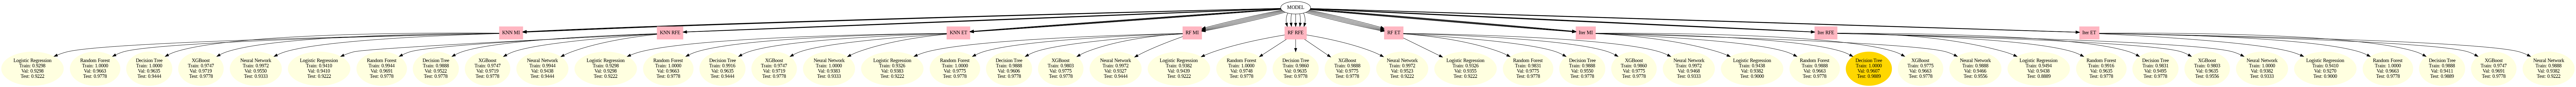

In [ ]:
from graphviz import Digraph
from IPython.display import Image, display

# Function to create and display the tree diagram
def create_tree_diagram(results_df, best_result):
    # Initialize graph
    dot = Digraph(format='png')
    dot.attr(rankdir='TB')  # Top-to-bottom tree layout

    # Add root node
    dot.node("root", "MODEL")

    # Iterate through results to create nodes
    for _, result in results_df.iterrows():
        feature_selection = result['Feature Selection Method']
        model = result['Model']
        train_acc = result['Training Accuracy']
        val_acc = result['Validation Accuracy']
        test_acc = result['Test Accuracy']

        # Create unique node names for each level
        feature_node = f"{feature_selection}"
        model_node = f"{feature_selection}_{model}"

        # Add nodes for each feature selection method
        dot.node(feature_node, feature_selection, shape="box", style="filled", color="lightpink")
        dot.edge("root", feature_node)

        # Highlight the best result
        if result.equals(best_result):
            color = "gold"
        else:
            color = "lightyellow"

        # Add model node with accuracies
        label = f"{model}\nTrain: {train_acc:.4f}\nVal: {val_acc:.4f}\nTest: {test_acc:.4f}"
        dot.node(model_node, label, shape="ellipse", style="filled", color=color)
        dot.edge(feature_node, model_node)

    # Render diagram to file
    diagram_path = "model_tree_diagram"
    dot.render(diagram_path, cleanup=True)
    print("Tree diagram saved as 'model_tree_diagram.png'.")

    # Display the diagram in output
    display(Image(filename=f"{diagram_path}.png"))

# Assuming `results_df` contains the results and `best_result` is the row with the best test accuracy
create_tree_diagram(results_df, best_result)


In [ ]:
!pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=91d0d9c547124896b0230ac23a6bd4586ce3b8d295d4e8c3d95818e2a36bc7ce
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import shap
import lime
import lime.lime_tabular

  0%|          | 0/90 [00:00<?, ?it/s]

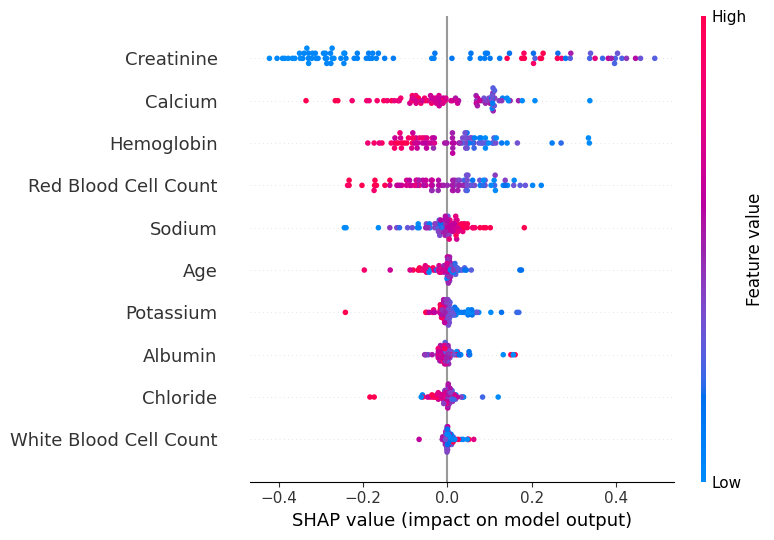

In [ ]:
# Apply SHAP explainability
if isinstance(best_model, (DecisionTreeClassifier, RandomForestClassifier, xgb.XGBClassifier)):
    # Use TreeExplainer for tree-based models
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test)

    # Summary plot for feature importance
    shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

    # Force plot for a single instance
    instance_idx = 0
    shap.force_plot(explainer.expected_value, shap_values[instance_idx], X_test.iloc[instance_idx], feature_names=X_test.columns)

else:
    # Use KernelExplainer for other model types like Logistic Regression and Neural Network
    # You may want to define a background dataset for KernelExplainer, using kmeans as you have done.
    explainer = shap.KernelExplainer(best_model.predict, shap.kmeans(X_test, 10))
    shap_values = explainer.shap_values(X_test)

    # Summary plot for feature importance
    shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

    # Handle expected_value correctly
    expected_value = explainer.expected_value
    if isinstance(expected_value, list):
        # If expected_value is a list, use the appropriate index (e.g., 1 for the positive class in binary classification)
        expected_value = expected_value[1]  # Adjust the index if needed

    # Force plot for a single instance
    instance_idx = 0
    shap.force_plot(expected_value, shap_values[instance_idx], X_test.iloc[instance_idx], feature_names=X_test.columns)

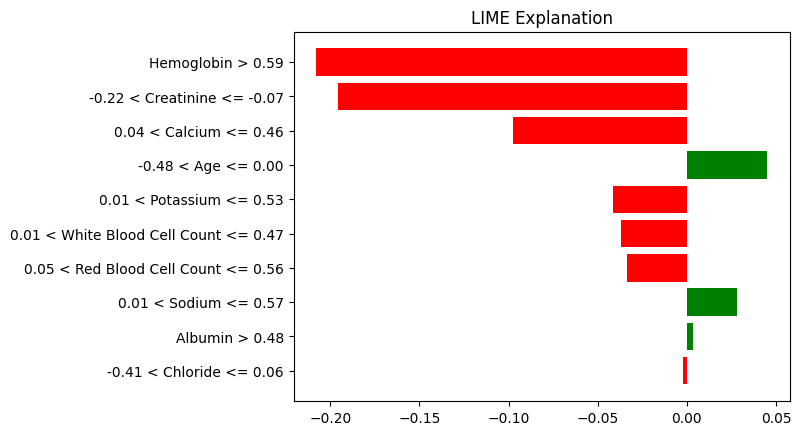

In [ ]:
# Create a LIME explainer
# Assume the best_model is already trained and X_train is the training data used for fitting the model
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),  # Training data as a NumPy array
    feature_names=X_train.columns,  # Feature names
    class_names=[0, 1],  # Adjust class names as needed
    mode='classification'  # Change to 'regression' if your model is for regression
)

# Choose an instance to explain
instance_idx = 0  # Index of the instance you want to explain from X_test
instance_to_explain = X_test.iloc[instance_idx]

# Generate LIME explanation
lime_exp = explainer.explain_instance(
    data_row=instance_to_explain.values,  # Convert the instance to a NumPy array
    predict_fn=best_model.predict_proba  # Use predict_proba for classification tasks
)

# Display LIME explanation
lime_exp.show_in_notebook(show_table=True, show_all=False)  # Display in notebook (Jupyter)

# Alternatively, if you're running in a script and want to save the output as a plot:
lime_exp.as_pyplot_figure()
plt.title("LIME Explanation")
plt.show()
